<a href="https://colab.research.google.com/github/Nazmin-Babubaker/Dementia-prediction-using-OASIS-dataset/blob/main/OASIS_LogisReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving oasis_cross-sectional-5708aa0a98d82080 (1).xlsx to oasis_cross-sectional-5708aa0a98d82080 (1).xlsx


In [ ]:
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

display(df.head())

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [ ]:
df_filtered_age = df[df['Age'] >= 60].drop(columns=['Hand', 'Delay'])
display(df_filtered_age.head())

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
8,OAS1_0010_MR1,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073
11,OAS1_0013_MR1,F,81,5.0,2.0,30.0,0.0,1664,0.679,1.055
13,OAS1_0015_MR1,M,76,2.0,NaN,28.0,0.5,1738,0.719,1.010


In [ ]:
display(df_filtered_age.isnull().sum())

,0
ID,0
M/F,0
Age,0
Educ,0
SES,18
MMSE,0
CDR,0
eTIV,0
nWBV,0
ASF,0


As seen from the previous output, the 'SES' column has 18 missing values. We can fill these missing values. For numerical data, a common approach is to fill missing values with the mean, median, or mode of the existing data. Let's use the median for this case.

In [ ]:
# Calculate the median of the 'SES' column
ses_median = df_filtered_age['SES'].median()

# Fill the missing values in the 'SES' column with the median
df_filtered_age['SES'].fillna(ses_median, inplace=True)

display(df_filtered_age.isnull().sum())

/tmp/ipython-input-35-1564729952.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered_age['SES'].fillna(ses_median, inplace=True)


,0
ID,0
M/F,0
Age,0
Educ,0
SES,0
MMSE,0
CDR,0
eTIV,0
nWBV,0
ASF,0


In [ ]:
df_filtered_age['Demented'] = (df_filtered_age['CDR'] >= 0.5).astype(int)

display(df_filtered_age.head())

display(df_filtered_age['Demented'].value_counts())

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Demented
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1
8,OAS1_0010_MR1,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0
11,OAS1_0013_MR1,F,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,0
13,OAS1_0015_MR1,M,76,2.0,3.0,28.0,0.5,1738,0.719,1.010,1


,count
Demented,
1,100
0,98


In [ ]:
# Split the DataFrame into females and males
df_females = df_filtered_age[df_filtered_age['M/F'] == 'F'].copy()
df_males = df_filtered_age[df_filtered_age['M/F'] == 'M'].copy()

display("Female Data:", df_females.head())
display("Male Data:", df_males.head())

display("Shape of Female Data:", df_females.shape)
display("Shape of Male Data:", df_males.shape)

'Female Data:'

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Demented
0,OAS1_0001_MR1,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0
2,OAS1_0003_MR1,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1
11,OAS1_0013_MR1,F,81,5.0,2.0,30.0,0.0,1664,0.679,1.055,0
17,OAS1_0019_MR1,F,89,5.0,1.0,30.0,0.0,1536,0.715,1.142,0
19,OAS1_0021_MR1,F,80,3.0,3.0,23.0,0.5,1794,0.765,0.978,1


'Male Data:'

,ID,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Demented
8,OAS1_0010_MR1,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0
13,OAS1_0015_MR1,M,76,2.0,3.0,28.0,0.5,1738,0.719,1.010,1
14,OAS1_0016_MR1,M,82,2.0,4.0,27.0,0.5,1477,0.739,1.188,1
21,OAS1_0023_MR1,M,82,2.0,3.0,27.0,0.5,1420,0.710,1.236,1
28,OAS1_0031_MR1,M,88,1.0,4.0,26.0,1.0,1419,0.674,1.236,1


'Shape of Female Data:'

(131, 11)

'Shape of Male Data:'

(67, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define features (X) and target (y) for females
X_females = df_females.drop(columns=['ID', 'M/F', 'Demented','CDR'])
y_females = df_females['Demented']

# Define features (X) and target (y) for males
X_males = df_males.drop(columns=['ID', 'M/F', 'Demented','CDR'])
y_males = df_males['Demented']

# Split female data into training and testing sets
X_females_train, X_females_test, y_females_train, y_females_test = train_test_split(X_females, y_females, test_size=0.2, random_state=42, stratify=y_females)

# Split male data into training and testing sets
X_males_train, X_males_test, y_males_train, y_males_test = train_test_split(X_males, y_males, test_size=0.2, random_state=42, stratify=y_males)

print("Shapes of Female Data Splits:")
print("X_females_train:", X_females_train.shape)
print("X_females_test:", X_females_test.shape)
print("y_females_train:", y_females_train.shape)
print("y_females_test:", y_females_test.shape)

print("\nShapes of Male Data Splits:")
print("X_males_train:", X_males_train.shape)
print("X_males_test:", X_males_test.shape)
print("y_males_train:", y_males_train.shape)
print("y_males_test:", y_males_test.shape)

Shapes of Female Data Splits:
X_females_train: (104, 7)
X_females_test: (27, 7)
y_females_train: (104,)
y_females_test: (27,)

Shapes of Male Data Splits:
X_males_train: (53, 7)
X_males_test: (14, 7)
y_males_train: (53,)
y_males_test: (14,)


In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

X_females_train_scaled = scaler.fit_transform(X_females_train)
X_females_test_scaled = scaler.transform(X_females_test)

X_males_train_scaled = scaler.fit_transform(X_males_train)
X_males_test_scaled = scaler.transform(X_males_test)

X_females_train_scaled = pd.DataFrame(X_females_train_scaled, columns=X_females_train.columns)
X_females_test_scaled = pd.DataFrame(X_females_test_scaled, columns=X_females_test.columns)
X_males_train_scaled = pd.DataFrame(X_males_train_scaled, columns=X_males_train.columns)
X_males_test_scaled = pd.DataFrame(X_males_test_scaled, columns=X_males_test.columns)


display("Scaled Female Training Features (X):", X_females_train_scaled.head())
display("Scaled Female Testing Features (X):", X_females_test_scaled.head())
display("Scaled Male Training Features (X):", X_males_train_scaled.head())
display("Scaled Male Testing Features (X):", X_males_test_scaled.head())

'Scaled Female Training Features (X):'

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0.526471,0.838910,-0.750805,0.845857,0.830735,0.058132,-0.869655
1,0.889875,0.059922,-0.750805,0.845857,-0.510876,-0.553780,0.448990
2,1.616684,-1.498054,1.177188,-2.205096,0.697407,-1.630745,-0.748077
3,0.526471,-0.719066,0.213192,0.591611,-1.560833,0.425279,1.730227
4,-0.321473,-1.498054,1.177188,0.845857,0.655742,-0.529304,-0.710669


'Scaled Female Testing Features (X):'

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0.647605,-0.719066,1.177188,0.845857,-1.385840,-0.627210,1.505777
1,0.163066,-0.719066,0.213192,0.337365,0.730739,1.061667,-0.785486
2,-0.442608,0.838910,-0.750805,-1.188111,0.805736,-1.288074,-0.841598
3,-0.321473,0.838910,-1.714802,0.337365,-0.844196,0.718996,0.841778
4,2.101223,0.059922,-0.750805,0.845857,-1.035854,-0.969880,1.066228


'Scaled Male Training Features (X):'

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,1.015252,1.203257,-1.374709,0.678818,0.688295,0.054819,-0.739460
1,-0.699230,0.510076,-1.374709,-2.694060,-0.211288,-1.019445,0.108838
2,0.355836,0.510076,0.402354,0.678818,-0.198880,0.128064,0.099909
3,1.279019,-1.569466,1.290886,0.116672,-1.712660,-0.140502,1.948306
4,-0.303580,1.203257,-0.486178,0.397745,0.390502,0.445460,-0.471576


'Scaled Male Testing Features (X):'

,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,-0.303580,-1.569466,0.402354,-0.164401,-1.421071,1.153498,1.546481
1,-0.962996,1.203257,-1.374709,0.959891,0.030669,1.348818,-0.132257
2,-0.699230,-0.876285,1.290886,-1.850840,-0.837894,-0.042842,0.814265
3,0.619602,1.203257,-1.374709,-0.164401,-0.248512,-0.970615,0.153486
4,0.751486,-0.876285,0.402354,0.116672,-1.092258,-0.457898,1.117867


In [ ]:
# Initialize Logistic Regression models for females and males
model_females = LogisticRegression()
model_males = LogisticRegression()

# Train the model on the scaled female TRAINING data
model_females.fit(X_females_train_scaled, y_females_train)

# Train the model on the scaled male TRAINING data
model_males.fit(X_males_train_scaled, y_males_train)

print("Logistic Regression models trained on training data for females and males.")

Logistic Regression models trained on training data for females and males.


In [ ]:
!pip install shap

In [ ]:
import shap

# Create a SHAP explainer for the female model
explainer_females = shap.Explainer(model_females, X_females_train_scaled)
shap_values_females = explainer_females(X_females_train_scaled)

# Create a SHAP explainer for the male model
explainer_males = shap.Explainer(model_males, X_males_train_scaled)
shap_values_males = explainer_males(X_males_train_scaled)

print("SHAP values calculated for female and male models.")

SHAP values calculated for female and male models.


SHAP summary plot for Females:


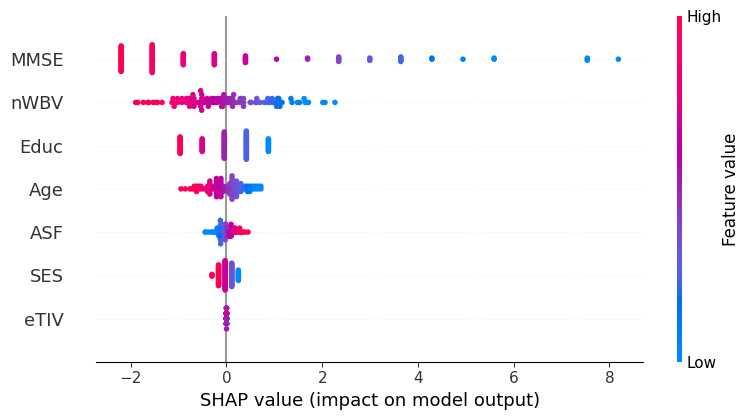


SHAP summary plot for Males:


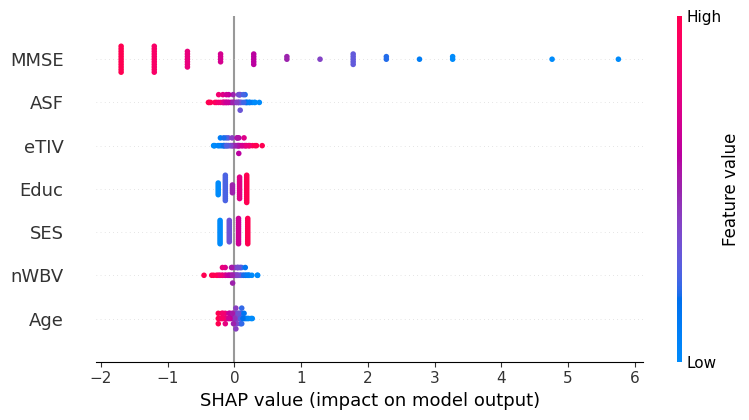

In [ ]:
# Visualize the SHAP values for females
print("SHAP summary plot for Females:")
shap.summary_plot(shap_values_females, X_females_train_scaled)

# Visualize the SHAP values for males
print("\nSHAP summary plot for Males:")
shap.summary_plot(shap_values_males, X_males_train_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the TRAINING data
y_pred_females_train = model_females.predict(X_females_train_scaled)
y_pred_males_train = model_males.predict(X_males_train_scaled)

# Make predictions on the TESTING data
y_pred_females_test = model_females.predict(X_females_test_scaled)
y_pred_males_test = model_males.predict(X_males_test_scaled)


# Calculate evaluation metrics for females on TRAINING data
accuracy_females_train = accuracy_score(y_females_train, y_pred_females_train)
precision_females_train = precision_score(y_females_train, y_pred_females_train)
recall_females_train = recall_score(y_females_train, y_pred_females_train)
f1_females_train = f1_score(y_females_train, y_pred_females_train)

# Calculate evaluation metrics for males on TRAINING data
accuracy_males_train = accuracy_score(y_males_train, y_pred_males_train)
precision_males_train = precision_score(y_males_train, y_pred_males_train)
recall_males_train = recall_score(y_males_train, y_pred_males_train)
f1_males_train = f1_score(y_males_train, y_pred_males_train)


# Calculate evaluation metrics for females on TESTING data
accuracy_females_test = accuracy_score(y_females_test, y_pred_females_test)
precision_females_test = precision_score(y_females_test, y_pred_females_test)
recall_females_test = recall_score(y_females_test, y_pred_females_test)
f1_females_test = f1_score(y_females_test, y_pred_females_test)

# Calculate evaluation metrics for males on TESTING data
accuracy_males_test = accuracy_score(y_males_test, y_pred_males_test)
precision_males_test = precision_score(y_males_test, y_pred_males_test)
recall_males_test = recall_score(y_males_test, y_pred_males_test)
f1_males_test = f1_score(y_males_test, y_pred_males_test)


# Display the metrics for TRAINING data
print("Evaluation Metrics for Female Model (Training Data):")
print(f"Accuracy: {accuracy_females_train:.4f}")
print(f"Precision: {precision_females_train:.4f}")
print(f"Recall: {recall_females_train:.4f}")
print(f"F1-score: {f1_females_train:.4f}")

print("\nEvaluation Metrics for Male Model (Training Data):")
print(f"Accuracy: {accuracy_males_train:.4f}")
print(f"Precision: {precision_males_train:.4f}")
print(f"Recall: {recall_males_train:.4f}")
print(f"F1-score: {f1_males_train:.4f}")


# Display the metrics for TESTING data
print("\nEvaluation Metrics for Female Model (Testing Data):")
print(f"Accuracy: {accuracy_females_test:.4f}")
print(f"Precision: {precision_females_test:.4f}")
print(f"Recall: {recall_females_test:.4f}")
print(f"F1-score: {f1_females_test:.4f}")

print("\nEvaluation Metrics for Male Model (Testing Data):")
print(f"Accuracy: {accuracy_males_test:.4f}")
print(f"Precision: {precision_males_test:.4f}")
print(f"Recall: {recall_males_test:.4f}")
print(f"F1-score: {f1_males_test:.4f}")

Evaluation Metrics for Female Model (Training Data):
Accuracy: 0.8750
Precision: 0.8864
Recall: 0.8298
F1-score: 0.8571

Evaluation Metrics for Male Model (Training Data):
Accuracy: 0.7736
Precision: 0.8333
Recall: 0.7812
F1-score: 0.8065

Evaluation Metrics for Female Model (Testing Data):
Accuracy: 0.8148
Precision: 0.8182
Recall: 0.7500
F1-score: 0.7826

Evaluation Metrics for Male Model (Testing Data):
Accuracy: 0.5000
Precision: 0.6250
Recall: 0.5556
F1-score: 0.5882


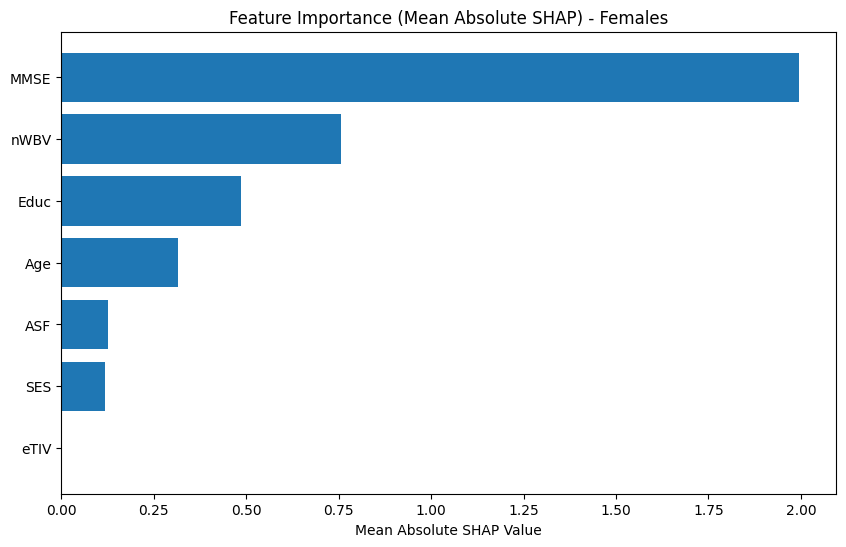

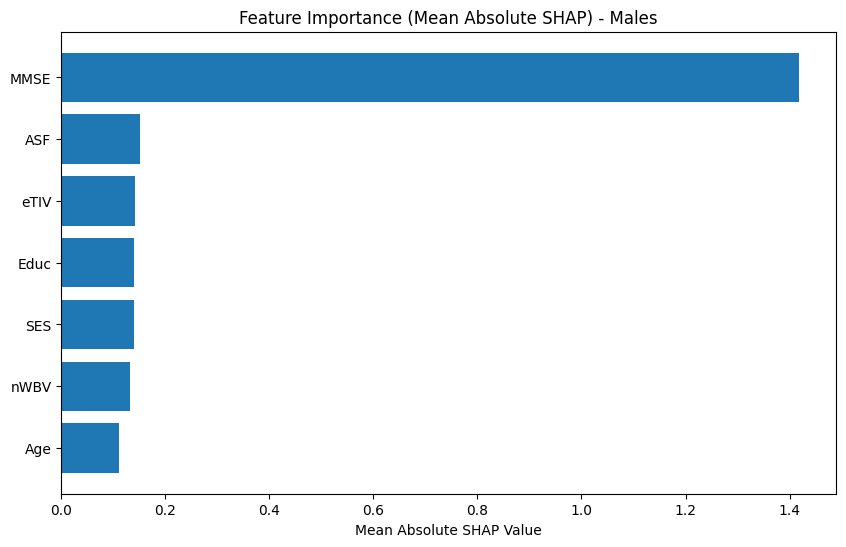

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean absolute SHAP values for females
mean_abs_shap_females = np.abs(shap_values_females.values).mean(axis=0)
feature_names = X_females_train_scaled.columns
shap_importance_females = pd.DataFrame(list(zip(feature_names, mean_abs_shap_females)), columns=['Feature', 'Mean Absolute SHAP'])
shap_importance_females = shap_importance_females.sort_values(by='Mean Absolute SHAP', ascending=False)

# Calculate mean absolute SHAP values for males
mean_abs_shap_males = np.abs(shap_values_males.values).mean(axis=0)
feature_names = X_males_train_scaled.columns
shap_importance_males = pd.DataFrame(list(zip(feature_names, mean_abs_shap_males)), columns=['Feature', 'Mean Absolute SHAP'])
shap_importance_males = shap_importance_males.sort_values(by='Mean Absolute SHAP', ascending=False)

# Create bar plot for female feature importance
plt.figure(figsize=(10, 6))
plt.barh(shap_importance_females['Feature'], shap_importance_females['Mean Absolute SHAP'])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance (Mean Absolute SHAP) - Females')
plt.gca().invert_yaxis()
plt.show()

# Create bar plot for male feature importance
plt.figure(figsize=(10, 6))
plt.barh(shap_importance_males['Feature'], shap_importance_males['Mean Absolute SHAP'])
plt.xlabel('Mean Absolute SHAP Value')
plt.title('Feature Importance (Mean Absolute SHAP) - Males')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Get the counts of demented and non-demented for females
demented_counts_females = df_females['Demented'].value_counts()

# Get the counts of demented and non-demented for males
demented_counts_males = df_males['Demented'].value_counts()

print("Demented and Non-Demented Counts for Females:")
display(demented_counts_females)

print("\nDemented and Non-Demented Counts for Males:")
display(demented_counts_males)

Demented and Non-Demented Counts for Females:


,count
Demented,
0,72
1,59



Demented and Non-Demented Counts for Males:


,count
Demented,
1,41
0,26


In [ ]:
# 1. Hyperparameter Tuning
print("Hyperparameter Tuning:")
print("Hyperparameter tuning involves optimizing the parameters of a machine learning model that are not learned from the data itself. These parameters, such as the regularization strength 'C' in Logistic Regression or the number of trees in a Random Forest, significantly impact model performance. By systematically searching through different combinations of hyperparameters (e.g., using techniques like Grid Search or Random Search) and evaluating the model's performance for each combination, we can find the set of hyperparameters that yields the best results on unseen data. This process helps in finding the optimal configuration for the chosen model without altering the underlying data.")

# 2. Using Different Algorithms
print("\nUsing Different Algorithms:")
print("Logistic Regression is a simple linear model. While it's a good baseline, other machine learning algorithms might capture more complex relationships in the data, potentially leading to better performance. For this binary classification task (predicting Demented or Non-Demented), algorithms like Support Vector Machines (SVM), Random Forests, or Gradient Boosting (e.g., XGBoost, LightGBM) could be explored. Each algorithm has its own strengths and weaknesses and makes different assumptions about the data, so trying different ones can reveal which is best suited for the specific patterns in the dataset.")

# 3. Ensemble Methods
print("\nEnsemble Methods:")
print("Ensemble methods combine the predictions of multiple individual models to produce a more robust and often more accurate prediction than any single model could achieve on its own. The core idea is that by aggregating the wisdom of multiple models, the errors of individual models can be averaged out. Common ensemble techniques include Bagging (e.g., Random Forests, which is an ensemble of decision trees), Boosting (e.g., Gradient Boosting Machines), and Stacking (training a meta-model to combine the predictions of several base models). Applying these methods can improve predictive accuracy, reduce variance (in Bagging), or reduce bias (in Boosting) without requiring changes to the original features.")

Hyperparameter Tuning:
Hyperparameter tuning involves optimizing the parameters of a machine learning model that are not learned from the data itself. These parameters, such as the regularization strength 'C' in Logistic Regression or the number of trees in a Random Forest, significantly impact model performance. By systematically searching through different combinations of hyperparameters (e.g., using techniques like Grid Search or Random Search) and evaluating the model's performance for each combination, we can find the set of hyperparameters that yields the best results on unseen data. This process helps in finding the optimal configuration for the chosen model without altering the underlying data.

Using Different Algorithms:
Logistic Regression is a simple linear model. While it's a good baseline, other machine learning algorithms might capture more complex relationships in the data, potentially leading to better performance. For this binary classification task (predicting Dement

## Hyperparameter tuning (example)

### Subtask:
Demonstrate hyperparameter tuning on one of the existing models (e.g., using GridSearchCV or RandomizedSearchCV on the Logistic Regression model) to find better parameters.


**Reasoning**:
Import GridSearchCV and define the parameter grid for hyperparameter tuning.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for Logistic Regression
# 'C' is the inverse of regularization strength; smaller values specify stronger regularization.
# 'penalty' specifies the norm used in the penalization ('l1' or 'l2').
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'] # 'l1' penalty requires a solver that supports it, 'liblinear' and 'saga' do. 'l2' is supported by all solvers. Let's start with 'l2'.
}

# Initialize GridSearchCV with the female model, parameter grid, and cross-validation settings
grid_search_females = GridSearchCV(model_females, param_grid, cv=5, scoring='accuracy')

**Reasoning**:
Fit GridSearchCV to the scaled female training data and print the best parameters and store the best estimator.



In [ ]:
# Fit grid_search to the scaled female training data
grid_search_females.fit(X_females_train_scaled, y_females_train)

# Print the best parameters found by GridSearchCV
print("Best parameters for Female Model:", grid_search_females.best_params_)

# Store the best estimator (the model with the best parameters)
best_model_females = grid_search_females.best_estimator_

print("\nBest Logistic Regression model for females stored.")

Best parameters for Female Model: {'C': 10, 'penalty': 'l2'}

Best Logistic Regression model for females stored.


## Evaluate tuned model

### Subtask:
Evaluate the performance of the tuned model using the test set and compare it to the original model's performance.


**Reasoning**:
Evaluate the performance of the tuned female model on the test set and compare it with the original model's performance.



In [ ]:
# Make predictions on the scaled female test data using the tuned model
y_pred_females_test_tuned = best_model_females.predict(X_females_test_scaled)

# Calculate evaluation metrics for the tuned female model
accuracy_females_test_tuned = accuracy_score(y_females_test, y_pred_females_test_tuned)
precision_females_test_tuned = precision_score(y_females_test, y_pred_females_test_tuned)
recall_females_test_tuned = recall_score(y_females_test, y_pred_females_test_tuned)
f1_females_test_tuned = f1_score(y_females_test, y_pred_females_test_tuned)

# Print the metrics for the tuned female model and compare with the original model's metrics
print("Evaluation Metrics for Tuned Female Model (Testing Data):")
print(f"Accuracy: {accuracy_females_test_tuned:.4f}")
print(f"Precision: {precision_females_test_tuned:.4f}")
print(f"Recall: {recall_females_test_tuned:.4f}")
print(f"F1-score: {f1_females_test_tuned:.4f}")

print("\nComparison with Original Female Model (Testing Data):")
print(f"Metric     | Original | Tuned")
print(f"-----------|----------|-------")
print(f"Accuracy   | {accuracy_females_test:.4f} | {accuracy_females_test_tuned:.4f}")
print(f"Precision  | {precision_females_test:.4f} | {precision_females_test_tuned:.4f}")
print(f"Recall     | {recall_females_test:.4f} | {recall_females_test_tuned:.4f}")
print(f"F1-score   | {f1_females_test:.4f} | {f1_females_test_tuned:.4f}")

Evaluation Metrics for Tuned Female Model (Testing Data):
Accuracy: 0.7778
Precision: 0.7500
Recall: 0.7500
F1-score: 0.7500

Comparison with Original Female Model (Testing Data):
Metric     | Original | Tuned
-----------|----------|-------
Accuracy   | 0.8148 | 0.7778
Precision  | 0.8182 | 0.7500
Recall     | 0.7500 | 0.7500
F1-score   | 0.7826 | 0.7500


## Discuss other techniques

### Subtask:
Briefly discuss how other techniques (different algorithms, ensemble methods) could be applied in this context.


**Reasoning**:
Discuss how different algorithms and ensemble methods could be applied to potentially improve the dementia prediction models for both males and females.



In [ ]:
# Discussing alternative techniques for model improvement

# Other Algorithms
print("Exploring different algorithms like Support Vector Machines (SVM), Random Forests, or Gradient Boosting (e.g., XGBoost, LightGBM) could potentially improve the dementia prediction models for both males and females. Logistic Regression is a linear model, and these alternative algorithms can capture non-linear relationships and interactions between features that Logistic Regression might miss. Each algorithm has its own strengths; for instance, Random Forests are good at handling complex interactions, while Gradient Boosting often provides high accuracy by iteratively improving predictions. Applying these different models could reveal which algorithm is best suited for the specific patterns in the male and female datasets.")

# Ensemble Methods
print("\nEnsemble methods offer another powerful approach to potentially enhance the robustness and accuracy of the predictions. Techniques like Bagging, Boosting, or Stacking could be applied. Bagging (e.g., using a Bagged Logistic Regression or Random Forest) involves training multiple models on different subsets of the training data and averaging their predictions to reduce variance. Boosting (e.g., AdaBoost, Gradient Boosting) sequentially builds models, with each new model focusing on correcting the errors of the previous ones, often leading to higher accuracy. Stacking involves training a meta-model to combine the predictions of several diverse base models. By combining the strengths of multiple models, ensemble methods can often provide more reliable and accurate predictions than any single model.")

# Further Experimentation
print("\nIt is important to note that the choice of the best technique among different algorithms and ensemble methods would require further experimentation and rigorous evaluation on the dataset for both the male and female subsets to determine which approach yields the most significant performance improvement.")

Exploring different algorithms like Support Vector Machines (SVM), Random Forests, or Gradient Boosting (e.g., XGBoost, LightGBM) could potentially improve the dementia prediction models for both males and females. Logistic Regression is a linear model, and these alternative algorithms can capture non-linear relationships and interactions between features that Logistic Regression might miss. Each algorithm has its own strengths; for instance, Random Forests are good at handling complex interactions, while Gradient Boosting often provides high accuracy by iteratively improving predictions. Applying these different models could reveal which algorithm is best suited for the specific patterns in the male and female datasets.

Ensemble methods offer another powerful approach to potentially enhance the robustness and accuracy of the predictions. Techniques like Bagging, Boosting, or Stacking could be applied. Bagging (e.g., using a Bagged Logistic Regression or Random Forest) involves traini

## Hyperparameter tuning for Male Model

### Subtask:
Demonstrate hyperparameter tuning on the male Logistic Regression model to find better parameters.

**Reasoning**:
Define the parameter grid and initialize GridSearchCV for the male model.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the same parameter grid as used for the female model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'] # Using 'l2' penalty as before.
}

# Initialize GridSearchCV with the male model, parameter grid, and cross-validation settings
grid_search_males = GridSearchCV(model_males, param_grid, cv=5, scoring='accuracy')

**Reasoning**:
Fit GridSearchCV to the scaled male training data and print the best parameters and store the best estimator.

In [ ]:
# Fit grid_search to the scaled male training data
grid_search_males.fit(X_males_train_scaled, y_males_train)

# Print the best parameters found by GridSearchCV
print("Best parameters for Male Model:", grid_search_males.best_params_)

# Store the best estimator (the model with the best parameters)
best_model_males = grid_search_males.best_estimator_

print("\nBest Logistic Regression model for males stored.")

Best parameters for Male Model: {'C': 1, 'penalty': 'l2'}

Best Logistic Regression model for males stored.


## Evaluate tuned Male model

### Subtask:
Evaluate the performance of the tuned male model using the test set and compare it to the original model's performance.

**Reasoning**:
Evaluate the performance of the tuned male model on the test set and compare it with the original model's performance.

In [ ]:
# Make predictions on the scaled male test data using the tuned model
y_pred_males_test_tuned = best_model_males.predict(X_males_test_scaled)

# Calculate evaluation metrics for the tuned male model
accuracy_males_test_tuned = accuracy_score(y_males_test, y_pred_males_test_tuned)
precision_males_test_tuned = precision_score(y_males_test, y_pred_males_test_tuned)
recall_males_test_tuned = recall_score(y_males_test, y_pred_males_test_tuned)
f1_males_test_tuned = f1_score(y_males_test, y_pred_males_test_tuned)

# Print the metrics for the tuned male model and compare with the original model's metrics
print("Evaluation Metrics for Tuned Male Model (Testing Data):")
print(f"Accuracy: {accuracy_males_test_tuned:.4f}")
print(f"Precision: {precision_males_test_tuned:.4f}")
print(f"Recall: {recall_males_test_tuned:.4f}")
print(f"F1-score: {f1_males_test_tuned:.4f}")

print("\nComparison with Original Male Model (Testing Data):")
print(f"Metric     | Original | Tuned")
print(f"-----------|----------|-------")
print(f"Accuracy   | {accuracy_males_test:.4f} | {accuracy_males_test_tuned:.4f}")
print(f"Precision  | {precision_males_test:.4f} | {precision_males_test_tuned:.4f}")
print(f"Recall     | {recall_males_test:.4f} | {recall_males_test_tuned:.4f}")
print(f"F1-score   | {f1_males_test:.4f} | {f1_males_test_tuned:.4f}")

Evaluation Metrics for Tuned Male Model (Testing Data):
Accuracy: 0.5000
Precision: 0.6250
Recall: 0.5556
F1-score: 0.5882

Comparison with Original Male Model (Testing Data):
Metric     | Original | Tuned
-----------|----------|-------
Accuracy   | 0.5000 | 0.5000
Precision  | 0.6250 | 0.6250
Recall     | 0.5556 | 0.5556
F1-score   | 0.5882 | 0.5882
